In [3]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Ham_int_ferro(L,hz):
    basis = spin_basis_1d(L)
    #hz=5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=-1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    #hz=5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

I should see how the ground state is looking like. It should be anti-ferromagnetic.<br /> 
<b> Update:</b> Physically, one possible way that can be seen is by computing magnetization as a function of $h_z$. However, this only works for ferromagnetic Hamiltonian, and not for anti-ferro. :( <br /> 
What is magnetization for the following Hamiltonian? <br /> 
$H = \sum \sigma_{i}^x \sigma_{i+1}^x+ h_z \sum \sigma_i^z$ <br /> 

$<m>=\sum \sigma_{i}^x / N$, where $N$ is number of spins.

In [11]:
def avg_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=1.0
    hx_arr = [[hx,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return np.dot(V,np.dot(s_x.toarray(),np.conj(V)))

def avg_square_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=1.0
    hx_arr = [[hx,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    s_x_sq=s_x**2
    return np.dot(V,np.dot(s_x_sq.toarray(),np.conj(V)))

In [58]:
L=8
hz=np.linspace(0,5,20)
avg_mag_arr=np.zeros(len(hz))
avg_square_mag_arr=np.zeros(len(hz))
for i in range(len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    V_gs=V_ferro[:,0]
    avg_mag_arr[i]=np.real(avg_mag(V_gs,L))/L
    avg_square_mag_arr[i]=np.real(avg_square_mag(V_gs,L))/L**2

In [18]:
L=10
hz=np.linspace(0,5,20)
avg_mag_arr10=np.zeros(len(hz))
avg_square_mag_arr10=np.zeros(len(hz))
for i in range(len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    V_gs=V_ferro[:,0]
    avg_mag_arr10[i]=np.real(avg_mag(V_gs,L))/L
    avg_square_mag_arr10[i]=np.real(avg_square_mag(V_gs,L))/L**2

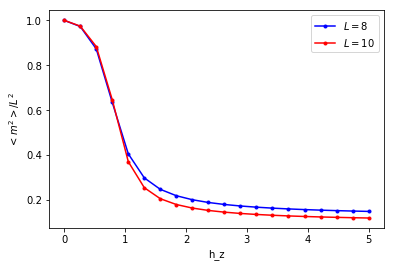

In [60]:
plt.plot(hz,avg_square_mag_arr, 'b.-', label=r"$L=8$")
plt.plot(hz,avg_square_mag_arr10, 'r.-', label=r"$L=10$")

#plt.plot(hz,avg_mag_arr, 'r', label=r"$<m/L>$")
plt.xlabel("h_z")
plt.ylabel(r"$<m^2>/L^2$")
plt.legend()

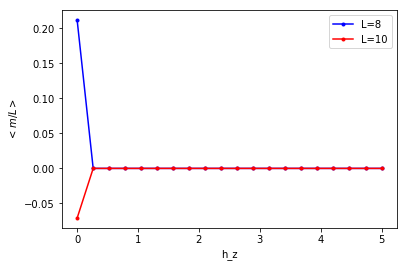

In [22]:
plt.plot(hz,avg_mag_arr, 'b.-', label="L=8")
plt.plot(hz,avg_mag_arr10, 'r.-', label="L=10")
plt.xlabel("h_z")
plt.ylabel(r"$<m/L>$")
plt.legend()

For groundstate of ferromagnetic Hamiltonian,magnetization $<m>$ is zero for all h/J values, while $<m^2>$ is what captures phase transitions. For anti-ferromagnetic Hamiltonian, staggered magnetization should be measured. $<m_s>= \sum_j (-1)^j \sigma_j^z$ will be zero while $<m_s^2>= \sum_{j,k}(-1)^{j+k} \sigma_j^z \sigma_k^z$ will capture phase transition. <br>
Things to think about: why <m> is zero for groundstate of both ferromagnetic Hamiltonian and anti-ferromagnetic Hamiltonian? Is it related to Ising symmetry obeyed by these Hamiltonians?

In [29]:
def avg_staggered_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=-1.0
    hx_arr = [[hx**i,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return np.dot(V,np.dot(s_x.toarray(),np.conj(V)))

def avg_square_staggered_mag(V,L):
    basis = spin_basis_1d(L)  
    hx=-1.0
    hx_arr = [[hx**i,i] for i in range(L)] # OBC
    static = [["x",hx_arr]]
    dynamic=[]
    s_x=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    s_x_sq=s_x**2
    return np.dot(V,np.dot(s_x_sq.toarray(),np.conj(V)))

In [65]:
L=8
hz=np.linspace(0,5,20)
avg_stag_mag_arr=np.zeros(len(hz))
avg_stag_square_mag_arr=np.zeros(len(hz))
for i in range(len(hz)):
    H_antiferro=Ham_int_antiferro(L,hz[i])
    E_antiferro,V_antiferro= H_antiferro.eigh()
    V_gs=V_antiferro[:,0]
    avg_stag_mag_arr[i]=np.real(avg_staggered_mag(V_gs,L))/L
    avg_stag_square_mag_arr[i]=np.real(avg_square_staggered_mag(V_gs,L))/L**2

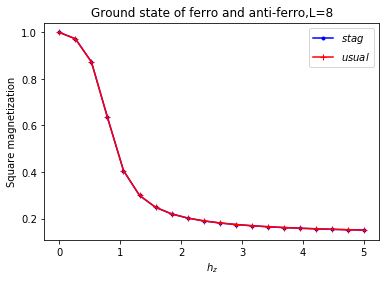

In [70]:
plt.plot(hz,avg_stag_square_mag_arr, 'b.-', label=r"$stag$")
plt.plot(hz,avg_square_mag_arr, 'r+-', label=r"$usual$")
plt.xlabel("$h_z$")
plt.title("Ground state of ferro and anti-ferro,L=8")
plt.ylabel(r"Square magnetization")
plt.legend()

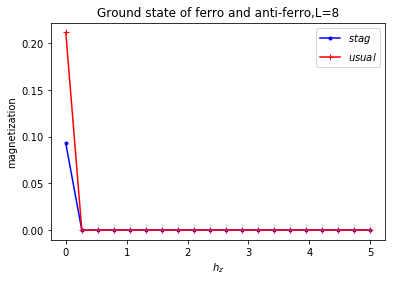

In [72]:
plt.plot(hz,avg_stag_mag_arr, 'b.-', label=r"$stag$")
plt.plot(hz,avg_mag_arr, 'r+-', label=r"$usual$")
plt.xlabel("$h_z$")
plt.title("Ground state of ferro and anti-ferro,L=8")
plt.ylabel(r"magnetization")
plt.legend()

In [84]:
for i in range(len(avg_stag_square_mag_arr)):
    print (str.format('{0:.20f}', avg_stag_square_mag_arr[i])), (str.format('{0:.20f}',avg_square_mag_arr[i]))

0.99999999999999955591 1.00000000000000000000
0.97261496821379544997 0.97261496821379544997
0.87290455814372824861 0.87290455814372913679
0.63482049378003191364 0.63482049378003180262
0.40618397286121482592 0.40618397286121565859
0.29924956960142889972 0.29924956960142917728
0.24836934884444966665 0.24836934884444950011
0.22001325168772437046 0.22001325168772428720
0.20217322742400481439 0.20217322742400489766
0.18996460145820054377 0.18996460145820082133
0.18109603869933352249 0.18109603869933343923
0.17436427894345629674 0.17436427894345629674
0.16908028861657153907 0.16908028861657167785
0.16482204735345612479 0.16482204735345606927
0.16131692386507634485 0.16131692386507637260
0.15838103864279595712 0.15838103864279595712
0.15588589329718208210 0.15588589329718208210
0.15373898652057993441 0.15373898652058007319
0.15187203329441223421 0.15187203329441226196
0.15023352478063581317 0.15023352478063581317


In [37]:
avg_stag_square_mag_arr==avg_square_mag_arr

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True], dtype=bool)

We see that staggered magnetization of ground state of anti-ferro Hamiltonian matches with that of magnetization of ground state of ferro Hamiltonian. What is the physical principle behind this?

### Fidelity of GS and HES of anti-ferro

In [1]:
def square(V1,V2):
    return (np.dot(V1,np.conj(V2)))**2

In [25]:
L=8
hz=np.linspace(0,5,20)
avg_mag_arr10=np.zeros(len(hz))
avg_square_mag_arr10=np.zeros(len(hz))
inner_prod_arr=np.zeros(len(hz))
for i in range(len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    H_antiferro= Ham_int_antiferro(L,hz[i])
    E_antiferro,V_antiferro= H_antiferro.eigh()
    V1=V_ferro[:,0]
    V2=V_antiferro[:,-1]
    inner_prod_arr[i]=np.real(square(V1,V2))
    print hz[i], square(V1,V2), np.real(avg_square_mag(V1,L)), np.real(avg_square_mag(V2,L))

0.0 (0.98737485623+0j) 64.0 64.0
0.263157894737 (0.783100872422+0j) 62.2473579657 62.2473579657
0.526315789474 (0.355691078602-0j) 55.8658917212 55.8658917212
0.789473684211 (0.066408332417-0j) 40.6285116019 40.6285116019
1.05263157895 (0.00648036505275+0j) 25.9957742631 25.9957742631
1.31578947368 (0.000842658712882+0j) 19.1519724545 19.1519724545
1.57894736842 (0.000163075069012-0j) 15.895638326 15.895638326
1.84210526316 (4.21104166771e-05+0j) 14.080848108 14.080848108
2.10526315789 (1.33406924831e-05+0j) 12.9390865551 12.9390865551
2.36842105263 (4.91268195596e-06-0j) 12.1577344933 12.1577344933
2.63157894737 (2.02973823003e-06-0j) 11.5901464768 11.5901464768
2.89473684211 (9.18377975259e-07-0j) 11.1593138524 11.1593138524
3.15789473684 (4.47265799125e-07-0j) 10.8211384715 10.8211384715
3.42105263158 (2.31496444776e-07-0j) 10.5486110306 10.5486110306
3.68421052632 (1.26113804834e-07+0j) 10.3242831274 10.3242831274
3.94736842105 (7.17729393236e-08+0j) 10.1363864731 10.1363864731
4.2

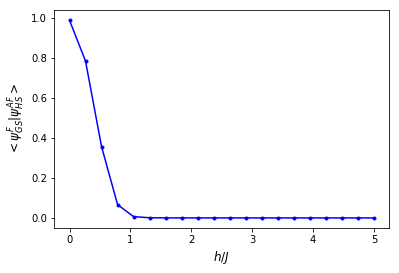

In [55]:
plt.plot(hz,inner_prod_arr, 'b.-')
plt.ylabel(r"$<\psi_{GS}^F|\psi_{HS}^{AF} >$",fontsize=12)
plt.xlabel(r"$h/J$",fontsize=12)

In [46]:
L=8
hz=np.linspace(0,5,20)
avg_mag_arr10=np.zeros(len(hz))
avg_square_mag_arr10=np.zeros(len(hz))
inner_prod_arr_ulta=np.zeros(len(hz))
for i in range(1,len(hz)):
    H_ferro= Ham_int_ferro(L,hz[i])
    E_ferro,V_ferro= H_ferro.eigh()
    H_antiferro= Ham_int_antiferro(L,hz[i])
    E_antiferro,V_antiferro= H_antiferro.eigh()
    V1=V_ferro[:,-1]
    V2=V_antiferro[:,0]
    inner_prod_arr_ulta[i]=np.real(square(V1,V2))
    print hz[i], square(V1,V2), np.real(avg_square_mag(V1,L)), np.real(avg_square_mag(V2,L))

0.263157894737 (0.783100872422+0j) 0.238990771686 0.238990771686
0.526315789474 (0.355691078602-0j) 0.95142474497 0.95142474497
0.789473684211 (0.066408332417+0j) 2.21186037091 2.21186037091
1.05263157895 (0.00648036505275-0j) 3.41853912566 3.41853912566
1.31578947368 (0.000842658712882+0j) 4.1857149546 4.1857149546
1.57894736842 (0.000163075069012-0j) 4.70526535924 4.70526535924
1.84210526316 (4.21104166771e-05+0j) 5.08900175086 5.08900175086
2.10526315789 (1.33406924831e-05+0j) 5.38772681569 5.38772681569
2.36842105263 (4.91268195596e-06+0j) 5.62838655681 5.62838655681
2.63157894737 (2.02973823003e-06+0j) 5.82709719544 5.82709719544
2.89473684211 (9.18377975259e-07+0j) 5.99429082125 5.99429082125
3.15789473684 (4.47265799125e-07-0j) 6.13710055293 6.13710055293
3.42105263158 (2.31496444776e-07+0j) 6.26060518601 6.26060518601
3.68421052632 (1.26113804834e-07-0j) 6.36853621847 6.36853621847
3.94736842105 (7.17729393236e-08-0j) 6.46370552471 6.46370552471
4.21052631579 (4.24183315149e-08

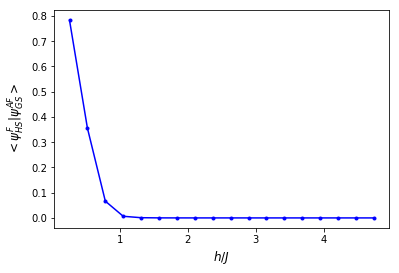

In [54]:
plt.plot(hz[1:-1],inner_prod_arr_ulta[1:-1], 'b.-')
plt.ylabel(r"$<\psi_{HS}^F|\psi_{GS}^{AF} >$",fontsize=12)
plt.xlabel(r"$h/J$",fontsize=12)